# Projeto de Arquitetura II
Aluna: Thuane Mikaella de França


## Otimizações de Código para Memória Cache e Paralelismo


### Memória Cache - Definições e metodologia

Este projeto tem como intúto mostar como o uso inteligente da memória cache disponível no computador pode tornar a execução de um código mais rápida e eficiente.

Será exibido alguns tipos de alterações no código que possibilitam uma melhor utilização da memória cache tornando mais frequente o uso dela, através de redução de Cache Misses e aumento de Cache Hits

Serão exploradas otimizações focadas no aproveitamento da localidade temporal e espacial da cache.



### Código

Foi-se desenvolvido um código que executa operações matemáticas arbitrárias em uma matriz de duas dimensões e tamanho variável.

Este código executa operações matemáticas e acessa valores semi-aleatórios da memória interna.

Testes que ocorreram no código:
* Otimização Temporal: Troca entre posições de variaveis X e Y para melhor aproveitamento da cache.
* Otimização Local: mudança de sentido de iteração.


In [0]:
# importações Necessárias
from tqdm.notebook import tqdm # para exibição de barras de progresso
from time import time # para benchmarking
from numba import prange, jit
import math
import random


def gerar_dados(t_x,t_y):
  """" Função gera uma matríz de tamanho definido pela chamada, com números aleatórios"""
  return [[random.randint(1,999) for i in range(t_x)] for j in range(t_y)]

def matematica(numero):
  return math.cos(numero) * math.sin(numero)

# código original / sem otimização temporal de cache
def codigo_sem_otimizacao(dados, t_x, t_y):
  resultado = [[0 for i in range(t_x)] for j in range(t_y)]

  for x in range(t_x):
    for y in range(t_y):
      if not (x == 0 or y == 0):
        resultado[y][x] = dados[y][x] + dados[y//x][x] // dados[y][x//y]

  return resultado

# código com otimização de cache / modificação nos loops
def codigo_com_otimizacao(dados, t_x, t_y):
  resultado = [[0 for i in range(t_x)] for j in range(t_y)]

  for y in range(t_y):
    for x in range(t_x):
      if not (x == 0 or y == 0):
        resultado[y][x] = dados[y][x] + dados[y//x][x] // dados[y][x//y]

  return resultado 

# código com otimização de cache / sem otimização espacial
def codigo_sem_otimizacao_sem_espacial(dados, t_x, t_y):
  resultado = [[0 for i in range(t_x)] for j in range(t_y)]

  for x in range(t_x-1,-1,-1):
    for y in range(t_y-1,-1,-1):
      if not (x == 0 or y == 0):
        resultado[y][x] = dados[y][x] + dados[y//x][x] // dados[y][x//y]

  return resultado

def codigo_com_otimizacao_sem_espacial(dados, t_x, t_y):
  resultado = [[0 for i in range(t_x)] for j in range(t_y)]
  for y in range(t_y-1,-1,-1):
    for x in range(t_x-1,-1,-1):
      if not (x == 0 or y == 0):
        resultado[y][x] = dados[y][x] + dados[y//x][x] // dados[y][x//y]

  return resultado



In [0]:
#@markdown Após essas alterações, foi observado que há um ganho notável de eficiência na execução do código com otimização em relação à posições da iteração nos loops, mas não há alterações significativas em relação ao sentido dos loops.
import pandas as pd


res = pd.DataFrame()

for t_x in tqdm(range(100,40000, 1000)):
    t_y = 100
    dados = gerar_dados(t_x,t_y)

    # testes

    t0 = time(); codigo_com_otimizacao(dados, t_x, t_y); t1 = time(); c1 = t1-t0
    t0 = time(); codigo_sem_otimizacao(dados, t_x, t_y); t1 = time(); c2 = t1-t0
    t0 = time(); codigo_com_otimizacao_sem_espacial(dados, t_x, t_y); t1 = time(); c3 = t1-t0
    t0 = time(); codigo_sem_otimizacao_sem_espacial(dados, t_x, t_y); t1 = time(); c4 = t1-t0


    res = res.append({
        'Código COM Otimização Temporal e COM Otimização Espacial': c1,
        'Código SEM Otimização Temporal e COM Otimização Espacial': c2,
        'Código COM Otimização Temporal e SEM Otimização Espacial': c3,
        'Código SEM Otimização Temporal e SEM Otimização Espacial': c4

    }, ignore_index=True)
    
  
res

,Código COM Otimização Temporal e COM Otimização Espacial,Código COM Otimização Temporal e SEM Otimização Espacial,Código SEM Otimização Temporal e COM Otimização Espacial,Código SEM Otimização Temporal e SEM Otimização Espacial
0,0.002999,0.002687,0.002854,0.002770
1,0.033647,0.032344,0.040124,0.035665
2,0.081356,0.063449,0.080378,0.079032
3,0.099099,0.094168,0.138438,0.130538
4,0.126945,0.130746,0.158718,0.160046
5,0.162496,0.157333,0.198898,0.205700
6,0.194651,0.190632,0.248320,0.248206
7,0.221007,0.229414,0.281443,0.286110
8,0.251149,0.252930,0.321399,0.327601
9,0.282804,0.285788,0.364284,0.388747


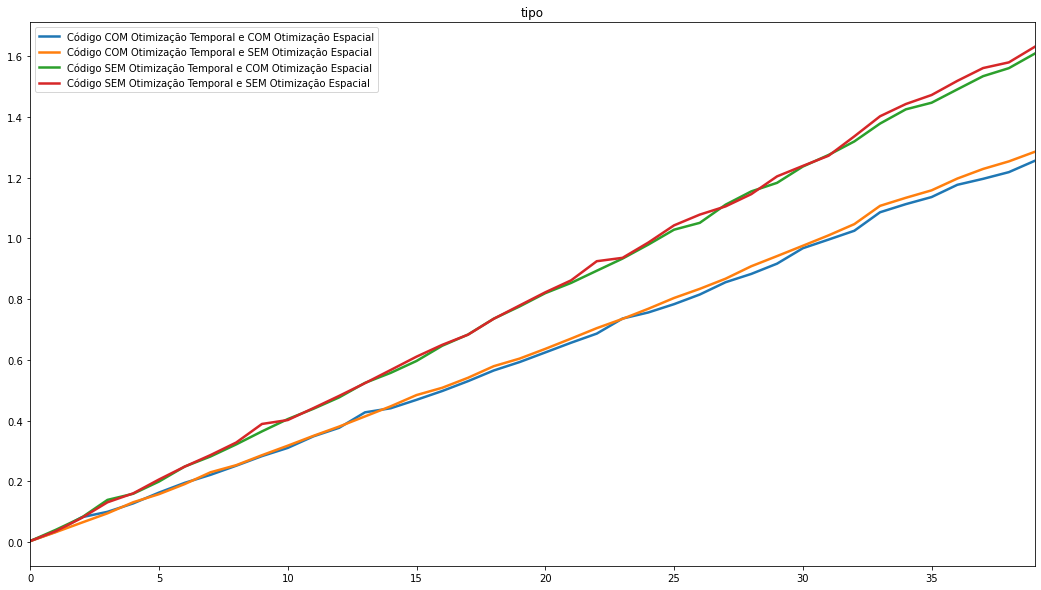

In [0]:
#@title Visualização Gráfica dos Resultados
res.plot(figsize=(18, 10), linewidth=2.5)

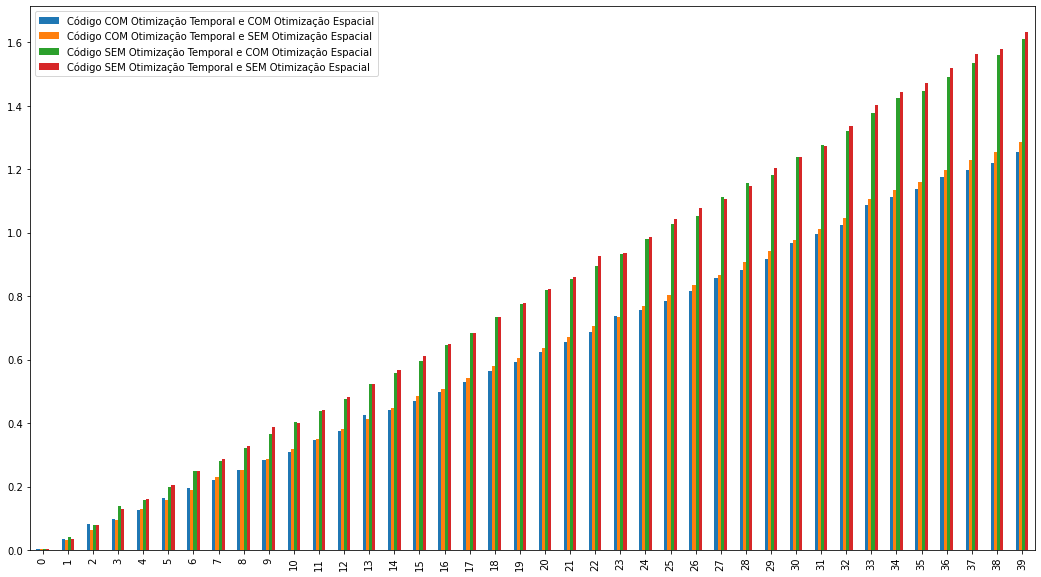

In [0]:
#@markdown a variação é mais notável quando se adiciona mais elementos às iterações
res.plot.bar(figsize=(18, 10), linewidth=1.5)

## Otimizações para Paralelismo

Neste projeto foi testado a capacidade de paralelismo no código utilizando as seguintes funcionalidades

* Classe Threads da biblioteca padrão do python
* Biblioteca Numba de otimização de código.

Devido ao GIL (Global Interpreter Lock, do python. os ganhos causados por paralelismo, onde existe a necessidade de acesso à uma memória compartilhada são relativamente pequenos.

* Testes Executados:


In [0]:
from threading import Thread

# valores de controle
t0= time()
codigo_com_otimizacao(dados, t_x, t_y)
t1 = time()
sem_threads = t1 - t0



testes = pd.DataFrame()

resultado_final = [0 for i in range(20)]

# teste com threads
class CalculoThread(Thread):
  def __init__(self, dados, t_x, t_y, thread_num):
    Thread.__init__(self)
    self.dados = dados
    self.t_x = t_x
    self.t_y = t_y
    self.thread_num = thread_num

  def run(self):
    global resultado_final
    resultado = [[0 for i in range(self.t_x)] for j in range(self.t_y)]
    dados,t_x, t_y = self.dados, self.t_x, self.t_y
    
    for y in range(t_y):
      for x in range(t_x):
        if not (x == 0 or y == 0):
          resultado[y][x] = dados[y][x] + dados[y//x][x] // dados[y][x//y]
    resultado_final[self.thread_num] = resultado


t_x = 10000
t_y = 1000
dados = gerar_dados(t_x,t_y)


for qtd_threads in tqdm(range(2,6)):
  # contar as threads
  minhas_threads = []


  # gerando as threads
  for i in range(qtd_threads):
    _t_y = (t_y // qtd_threads) * i
    novo = CalculoThread(dados, t_x, _t_y, i)
    minhas_threads.append(novo)

  t0 = time() # benchmarking
  for i in minhas_threads: i.start()
  for i in minhas_threads: i.join()
  t1 = time()
  com_threads = t1 - t0


  print(f"{qtd_threads} threads: {com_threads}")

  testes = testes.append({'Código COM Paralelismo': com_threads,
                 'QTD_THREADS': qtd_threads}, ignore_index=True)
testes

2 threads: 1.5073368549346924
3 threads: 3.2212088108062744
4 threads: 4.7866973876953125
5 threads: 6.3425798416137695



,Código COM Paralelismo,QTD_THREADS
0,1.507337,2.0
1,3.221209,3.0
2,4.786697,4.0
3,6.342580,5.0


código sem threads 3.122612476348877


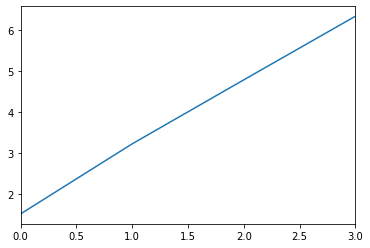

In [0]:
testes['Código COM Paralelismo'].plot();
print(f"código sem threads {sem_threads}")

### Resultado:
Com duas threads, é notavel a melhoria de desempenho em relação ao código sem paralelismo. / mas a performance é reduzida ao adicionar mais threads, devido à trava do interpretador python (GIL).

#### ~3.1 no código sem paralelização
#### ~1.5 com duas threads
#### ~3.5 com três threads

In [0]:
import numba as nb



def codigo_sem_otimizacao_sem_espacial(dados, t_x, t_y):
  resultado = [[0 for i in range(t_x)] for j in range(t_y)]

  for x in nb.prange(t_x-1,-1,-1):
    for y in range(t_y-1,-1,-1):
      if not (x == 0 or y == 0):
        resultado[y][x] = dados[y][x] + dados[y//x][x] // dados[y][x//y]

  return resultado

codigo_sem_otimizacao_sem_espacial(dados, t_x, t_y)

In [0]:
#@title 
import pandas as pd


res = pd.DataFrame()

for t_x in tqdm(range(100,20000, 1000)):
    t_y = 100
    dados = gerar_dados(t_x,t_y)

    # testes

    t0 = time(); codigo_com_otimizacao(dados, t_x, t_y); t1 = time(); c1 = t1-t0
    t0 = time(); codigo_sem_otimizacao(dados, t_x, t_y); t1 = time(); c2 = t1-t0
    t0 = time(); codigo_com_otimizacao_sem_espacial(dados, t_x, t_y); t1 = time(); c3 = t1-t0
    t0 = time(); codigo_sem_otimizacao_sem_espacial(dados, t_x, t_y); t1 = time(); c4 = t1-t0
    t0 = time(); codigo_paralelizado_em_x_com_otimizacao(dados, t_x, t_y); t1 = time(); c5 = t1-t0
    t0 = time(); codigo_paralelizado_em_y_com_otimizacao(dados, t_x, t_y); t1 = time(); c6 = t1-t0
    t0 = time(); codigo_paralelizado_em_xy_com_otimizacao(dados, t_x, t_y); t1 = time(); c7 = t1-t0
    res = res.append({
        'Código COM Otimização Temporal e COM Otimização Espacial': c1,
        'Código SEM Otimização Temporal e COM Otimização Espacial': c2,
        'Código COM Otimização Temporal e SEM Otimização Espacial': c3,
        'Código SEM Otimização Temporal e SEM Otimização Espacial': c4,
        'Código PARALELIZADO em X COM Otimização Temporal': c5,
        'Código PARALELIZADO em Y COM Otimização Temporal': c6,
        'Código PARALELIZADO em X E Y COM Otimização Temporal': c7,


    }, ignore_index=True)
    
  
res

In [0]:
#@title
# código com otimização de cache / modificação nos loops
@jit(parallel=True)
def codigo_paralelizado_em_y_com_otimizacao(dados, t_x, t_y):
  resultado = [[0 for i in range(t_x)] for j in range(t_y)]

  for y in prange(t_y):
    for x in range(t_x):
      if not (x == 0 or y == 0):
        resultado[y][x] = dados[y][x] + dados[y//x][x] // dados[y][x//y]

  return resultado 

@jit(parallel=True)
def codigo_paralelizado_em_x_com_otimizacao(dados, t_x, t_y):
  resultado = [[0 for i in range(t_x)] for j in range(t_y)]

  for y in range(t_y):
    for x in prange(t_x):
      if not (x == 0 or y == 0):
        resultado[y][x] = dados[y][x] + dados[y//x][x] // dados[y][x//y]

  return resultado 

@jit(parallel=True)
def codigo_paralelizado_em_xy_com_otimizacao(dados, t_x, t_y):
  resultado = [[0 for i in range(t_x)] for j in range(t_y)]

  for y in prange(t_y):
    for x in prange(t_x):
      if not (x == 0 or y == 0):
        resultado[y][x] = dados[y][x] + dados[y//x][x] // dados[y][x//y]

  return resultado 

import multiprocessing.dummy as mp 



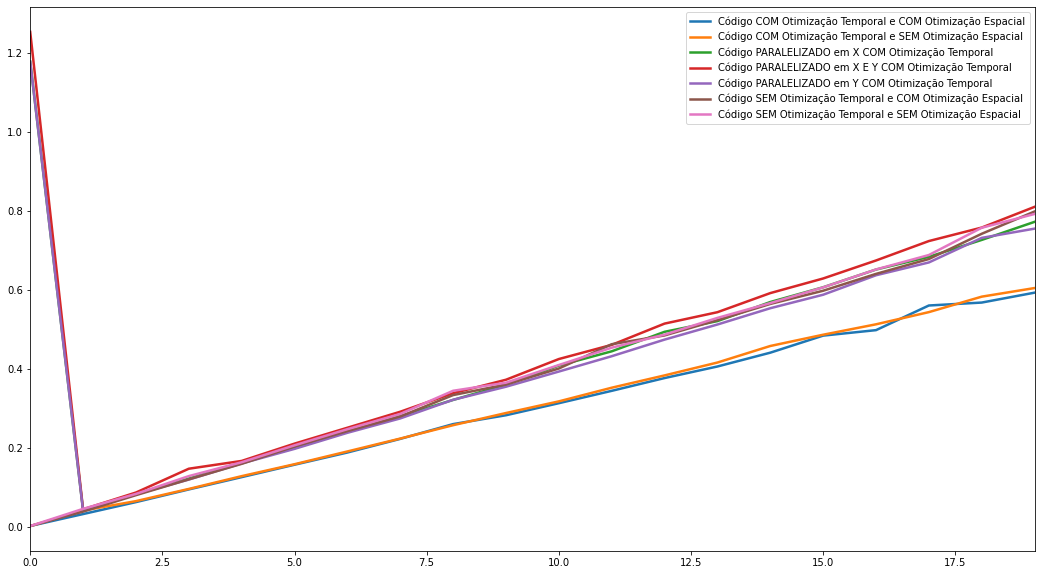

In [0]:
res.plot(figsize=(18, 10), linewidth=2.5)

# Otimização com numba
utilizando-se do decorador de paralelização @njit do numba, que compila o código python em C, devido ao uso de listas e abstrações da linguagem python, o código mantém uma performance muito similar à do python